# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `KNN Classifiers`.


## Instructions
- Do not Use Direct Inbuilt functions for the Task.
- Numpy or other math libraries are allowed 
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not change the contents of the Given cells. Use new cells to Write your code.


## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q1.ipynb`
- Fill the Name and Roll number in the below markdown

Name: Siddik Ayyappa Naraharisetti<br>
Roll Number: 2020101089 <br>

### Dataset

Use the code below to load the Dataset

In [140]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [141]:
#Load data
iris = pd.read_csv('Iris.csv')
#data cleaning
iris.drop(columns="Id",inplace=True)

In [142]:
#features and labels
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Write your Code below for KNN Classifier.<br>
Use different values of K and test the accuracies.

### Beginning the code

In [143]:
pd.DataFrame(X_train)

,0,1,2,3
0,6.4,3.1,5.5,1.8
1,5.4,3.0,4.5,1.5
2,5.2,3.5,1.5,0.2
3,6.1,3.0,4.9,1.8
4,6.4,2.8,5.6,2.2
...,...,...,...,...
115,4.9,3.1,1.5,0.1
116,6.3,2.9,5.6,1.8
117,5.8,2.7,4.1,1.0
118,7.7,3.8,6.7,2.2


In [144]:
pd.DataFrame(y_train)


,0
0,Iris-virginica
1,Iris-versicolor
2,Iris-setosa
3,Iris-virginica
4,Iris-virginica
...,...
115,Iris-setosa
116,Iris-virginica
117,Iris-versicolor
118,Iris-virginica


In [145]:
import statistics as stat

class KNN():
    def __init__(self, x_train, y_train, k):
        self.X = x_train
        self.y, self.y_key_forward, self.y_key_back = self.to_categorical(y_train)
        self.y_train = y_train
        self.k = k
    def to_categorical(self, y):
        y = np.array(y)
        cat = np.unique(y)
        n_cat = len(cat)
        temp = dict()
        temp_1 = dict()
        for i in range(n_cat):
            temp[cat[i]] = i
            temp_1[i] = cat[i]
        del cat
        cat_labels = [temp[i] for i in y]
        return cat_labels, temp,temp_1
    def neighbours(self, sample):
        min_distance, dist = np.inf, []
        for idx, i in enumerate(self.X):
            dist += [(np.sum((sample - i)**2), idx)]
        dist.sort(key=lambda pair:pair[0])
        dist = np.array(np.array(dist))[:self.k]
        labels = [self.y[int(i[1])] for i in dist]           
        return labels
    def forward(self, X):
        neighbours = []
        for i in X:
            neighbours += [self.neighbours(i)]
        labels = []
        for neighbour in neighbours:
            labels += [stat.mode(neighbour)]
        labels = np.array(labels)
        return labels
    def evaluate(self, X, y):
        labels = self.forward(X)
        if(len(labels) != len(y)):
            raise ValueError("Check Labels")
        y_labels = [self.y_key_forward[i] for i in y]
        score = 0
        array = ["=","=","=","=","=","=","=","=","=",">"]
        for i in range(len(y_labels)):
            if(y_labels[i] == labels[i]):
                score += 1
        return(score/len(y)*100)

In [146]:
accuracies = []
for k in range(1, 110):
    knn = KNN(X_train, y_train, k = k)
    accuracies += [knn.evaluate(X_test, y_test)]

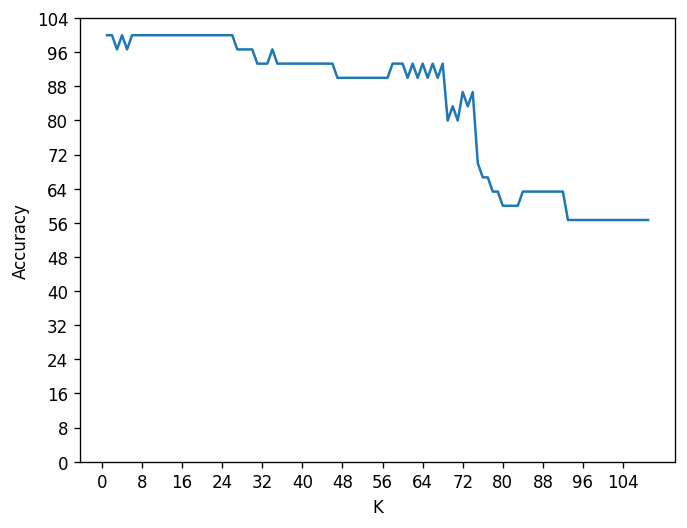

In [150]:
import matplotlib.pyplot as plot
plot.figure(dpi=120)
plot.plot(range(1, len(accuracies)+1), accuracies)
plot.xticks(range(0, len(accuracies), 8))
plot.yticks(range(0, len(accuracies), 8))
plot.xlabel("K")
plot.ylabel("Accuracy")
plot.show()

### Questions

1) What are the Advantages and Disadvantages of KNN algorithm?<br>
2) What is the complexity of the KNN algorithm during Training and Testing?<br> 
3) Is euclidian distance the only distance metric used in KNN? 
4) what K value gave the best accuracy?